# 概要

![jupyter](https://github.com/lifeismovie/data/blob/master/other/Mind%20Mapping.png?raw=true)

- 基于上述思维导图，案例分析顺序为：  
1、‘业务重要指标概览’、  
2、‘客户资源(客流量)分析’、    
3、‘坐席拨打行为分析’、  


# 一、数据加载及清洗

## 数据加载&预览

In [1]:
import pandas as pd # 数据处理包
import numpy as np # 向量、矩阵支持包
import matplotlib.pyplot as plt # 绘图包

df = pd.read_excel(r'D:\WD53259\数据\2019年7月\借呗京东数据每日追踪明细-新_20190801.xlsx') # 方便操作直接excel载入数据集
                                # 加载mysql数据到内存
pd.set_option('display.max_columns', None) # 显示所有字段
df.head() #预览数据前五行

,渠道来源,流水号,是否申请验车,所在省,所在市,所在地区,省,市,姓名,脱敏手机号,借款人uid,初始额度,日利率,申请时间,失效时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,订单状态,当前状态,邀约结果,派单时间,派单省份,派单城市,派单门店,门店退回时间,是否按揭,预约到店时间,到店时间,门店提交初审时间,终审通过时间,终审额度,提款成功时间,放款金额,放款门店,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时,当天通次,当天接通通次,当天有效通次,当天通时,近3日通次,近3日接通通次,近3日通时,近7日通次,近7日接通通次,近7日通时,近15日通次,近15日接通通次,近15日通时,本月累计通次,本月累计接通通次,本月累计通时
0,京东,1190723101839560139,是,新疆,阿拉尔,NaN,NaN,NaN,王雅萍,135****4442,17042563,76051.0,0.0,2019-07-23 10:35:48.0,2019-08-22 10:36:18.0,2019-03-21 09:54:10.0,郑姝博,14775190,一组,贷款业务一部,其他,未联系,意愿待确认,NaN,NaN,NaN,NaN,NaN,是,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,12.0,6.0,6.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,借呗,201904160577116317A,是,浙江省,温州市,永嘉县,浙江省,温州市,曾玲,139****1455,20198848,197000.0,0.0,2019-04-22 10:14:02.0,2019-05-16 14:22:57.0,2019-08-01 09:44:27.0,吴国华,11720848,一组,贷款业务一部,回款中,未联系,NaN,2019-04-22 10:42:50.0,浙江省,温州市,温州旗舰,NaN,是,2019-04-22 14:00:00.0,2019-04-22 17:03:38.0,2019-04-22 17:03:41.0,2019-04-22 17:31:30.0,171000.0,2019-04-22 17:33:45,171000.0,温州旗舰,23.0,19.0,17.0,2287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,借呗,201903050531599377A,是,浙江省,杭州市,余杭区,浙江省,温州市,秦邱涛,182****3118,10711585,68000.0,0.0,2019-03-05 10:50:28.0,2019-04-04 11:00:06.0,2019-03-05 15:33:31.0,朱容辉,13480573,五组,贷款业务三部,其他,派单,无借款需求,NaN,NaN,NaN,NaN,NaN,未知,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,4.0,4.0,3.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,借呗,201810280374949836A,是,浙江省,温州市,鹿城区,浙江省,温州市,张卡迪,189****2666,16469543,68000.0,0.0,2018-10-28 01:05:36.0,2018-11-22 21:14:47.0,2018-11-01 00:00:00.0,王惟潞,14775574,一组,贷款业务一部,其他,待跟进,意愿待确认,NaN,NaN,NaN,NaN,NaN,未知,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,12.0,7.0,7.0,765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,京东,1190326101167045641,是,新疆,阿拉尔,NaN,NaN,NaN,龙仕武,183****0462,17664903,39200.0,0.0,2019-03-26 11:55:18.0,2019-04-25 11:55:25.0,2019-01-09 09:44:19.0,许克波,14889353,二组-借呗客服,客服,其他,待跟进,未接通,NaN,NaN,NaN,NaN,NaN,否,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info() # 查看数据集基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231305 entries, 0 to 231304
Data columns (total 57 columns):
渠道来源        231305 non-null object
流水号         231305 non-null object
是否申请验车      231305 non-null object
所在省         214856 non-null object
所在市         214856 non-null object
所在地区        192184 non-null object
省           207543 non-null object
市           207543 non-null object
姓名          231303 non-null object
脱敏手机号       231305 non-null object
借款人uid      231305 non-null int64
初始额度        231305 non-null float64
日利率         231045 non-null float64
申请时间        231305 non-null object
失效时间        231305 non-null object
分配时间        231261 non-null object
坐席名字        229262 non-null object
坐席uid       231305 non-null int64
小组名称        229262 non-null object
部门名称        225404 non-null object
订单状态        231305 non-null object
当前状态        231305 non-null object
邀约结果        191839 non-null object
派单时间        26132 non-null object
派单省份        26144 non-null object
派单城市        2614

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)# 这个设置的是保留小数点后1位。对df.describe()的输出输出数值精度设置；
df.describe() # 查看描述统计信息

,借款人uid,初始额度,日利率,坐席uid,终审额度,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时,当天通次,当天接通通次,当天有效通次,当天通时,近3日通次,近3日接通通次,近3日通时,近7日通次,近7日接通通次,近7日通时,近15日通次,近15日接通通次,近15日通时,本月累计通次,本月累计接通通次,本月累计通时
count,231305.00,231305.00,231045.00,231305.00,231305.00,231305.00,230338.00,230338.00,230338.00,230338.00,3086.00,3086.00,3086.00,3086.00,10474.00,10474.00,10474.00,16743.00,16743.00,16743.00,34938.00,34938.00,34938.00,3086.00,3086.00,3086.00
mean,19032131.08,91659.49,0.00,18474995.36,3287.50,3279.01,7.90,3.44,3.25,462.21,1.36,0.47,0.44,40.45,1.53,0.54,51.52,1.61,0.56,53.76,1.87,0.67,70.48,1.36,0.47,40.45
std,3076207.25,55214.64,0.00,7225203.07,17572.71,17545.59,7.31,3.83,3.65,595.93,0.82,0.65,0.64,102.11,1.27,0.86,145.19,1.39,0.91,149.83,1.87,1.12,190.23,0.82,0.65,102.11
min,5344.00,2000.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-173.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,17468323.00,58000.00,0.00,14522950.00,0.00,0.00,3.00,1.00,1.00,98.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
50%,19476761.00,72000.00,0.00,14889578.00,0.00,0.00,6.00,2.00,2.00,260.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
75%,21360042.00,103000.00,0.00,26003802.00,0.00,0.00,10.00,4.00,4.00,592.00,1.00,1.00,1.00,39.00,2.00,1.00,43.00,2.00,1.00,44.00,2.00,1.00,54.00,1.00,1.00,39.00
max,23119001.00,1973000.00,0.00,26008426.00,204000.00,200000.00,236.00,180.00,170.00,16012.00,14.00,8.00,8.00,1478.00,21.00,19.00,2908.00,38.00,20.00,3494.00,42.00,21.00,4320.00,14.00,8.00,1478.00


- count：计数
- mean：平均数
- std：标准差
- min：最小值
- 25%：第一四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
- 50%：50%分位值（中位数）
- 75%：第三四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
- max：最大值

In [4]:
df.mode() #查看数据集众数

,渠道来源,流水号,是否申请验车,所在省,所在市,所在地区,省,市,姓名,脱敏手机号,借款人uid,初始额度,日利率,申请时间,失效时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,订单状态,当前状态,邀约结果,派单时间,派单省份,派单城市,派单门店,门店退回时间,是否按揭,预约到店时间,到店时间,门店提交初审时间,终审通过时间,终审额度,提款成功时间,放款金额,放款门店,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时,当天通次,当天接通通次,当天有效通次,当天通时,近3日通次,近3日接通通次,近3日通时,近7日通次,近7日接通通次,近7日通时,近15日通次,近15日接通通次,近15日通时,本月累计通次,本月累计接通通次,本月累计通时
0,借呗,11808319379902545,是,浙江省,阿拉尔,金水区,浙江省,郑州市,,135****3555,15736000.00,60000.00,0.00,2018-12-05 14:05:43.0,1970-01-01 08:00:00.0,2018-11-01 00:00:00.0,钱有文,14889478.00,二组-借呗客服,客服,其他,待跟进,意愿待确认,2019-03-29 09:15:00.0,浙江省,郑州市,杭州签约中心,2018-11-27 10:33:32.0,未知,2019-02-25 13:00:00.0,2018-12-25 15:25:21.0,2018-08-25 10:11:53.0,2018-10-09 14:24:59.0,0.00,2018-09-29 14:49:33,0.00,杭州签约中心,2.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
1,NaN,11809039386972749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16038272.00,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 13:26:12.0,NaN,NaN,2019-01-10 16:55:16.0,2018-08-27 09:59:04.0,2018-10-19 15:00:19.0,nan,2018-10-18 16:05:54,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,NaN,11809049388335402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17642409.00,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 14:00:01.0,NaN,NaN,2019-01-31 10:27:54.0,NaN,2018-10-23 17:43:59.0,nan,2018-11-12 20:26:32,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,NaN,11809069394084016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19480708.00,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 14:18:01.0,NaN,NaN,2019-02-26 13:33:38.0,NaN,2018-10-26 13:51:29.0,nan,2018-11-28 18:30:55,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,NaN,11809079395762077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21466292.00,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 14:28:48.0,NaN,NaN,2019-02-28 14:49:21.0,NaN,2018-10-26 14:37:59.0,nan,2018-12-25 09:35:24,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,NaN,11809079395970340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 14:31:54.0,NaN,NaN,2019-03-13 11:12:51.0,NaN,2018-10-30 15:40:09.0,nan,2019-01-04 15:04:26,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,NaN,11809079396232498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 14:36:31.0,NaN,NaN,2019-03-21 11:15:54.0,NaN,2018-10-31 17:22:59.0,nan,2019-01-08 17:34:24,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,NaN,11809079396503958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 15:01:18.0,NaN,NaN,2019-04-03 15:13:03.0,NaN,2018-11-05 13:32:39.0,nan,2019-01-09 19:20:25,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,NaN,11809089397227014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-27 16:40:57.0,NaN,NaN,2019-04-04 14:40:45.0,NaN,2018-11-08 17:15:29.0,nan,2019-02-20 12:46:55,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,NaN,11809089397390352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28 09:50:53.0,NaN,NaN,2019-06-06 15:35:35.0,NaN,2018-12-01 15:57:59.0,nan,2019-02-26 13:16:56,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
df['小组名称'].value_counts() # 查看字段值频数

二组-借呗客服     82307
一组          75270
五组          67570
客户服务呼入二组     3858
T2二组          133
T2一组          122
业务支持组           1
二组              1
Name: 小组名称, dtype: int64

In [6]:
df['终审额度'].corr(df['放款金额']) # 查看两个字段值相关性（R^2：R方）

0.9984156099623097

In [7]:
df.columns # 查看字段索引

Index(['渠道来源', '流水号', '是否申请验车', '所在省', '所在市', '所在地区', '省', '市', '姓名', '脱敏手机号',
       '借款人uid', '初始额度', '日利率', '申请时间', '失效时间', '分配时间', '坐席名字', '坐席uid',
       '小组名称', '部门名称', '订单状态', '当前状态', '邀约结果', '派单时间', '派单省份', '派单城市', '派单门店',
       '门店退回时间', '是否按揭', '预约到店时间', '到店时间', '门店提交初审时间', '终审通过时间', '终审额度',
       '提款成功时间', '放款金额', '放款门店', '数据累计通次', '数据累计接通通次', '数据累计有效通次', '数据累计通时  ',
       '当天通次', '当天接通通次', '当天有效通次', '当天通时', '近3日通次', '近3日接通通次', '近3日通时',
       '近7日通次', '近7日接通通次', '近7日通时', '近15日通次', '近15日接通通次', '近15日通时', '本月累计通次',
       '本月累计接通通次', '本月累计通时'],
      dtype='object')

##  数据清洗

- 预览可知部分字段对当前分析无意义，需删除；

In [8]:
df.shape # 查看原始行列数

(231305, 57)

In [9]:
drop_columns = [ '渠道来源','是否申请验车','脱敏手机号','日利率','失效时间','是否按揭','订单状态','当前状态','邀约结果','派单时间','派单省份','派单城市','派单门店','预约到店时间','到店时间','终审通过时间','放款门店','当天通次', '当天接通通次', '当天有效通次', '当天通时', '近3日通次', '近3日接通通次', '近3日通时','近7日通次', '近7日接通通次', '近7日通时', '近15日通次', '近15日接通通次', '近15日通时', '本月累计通次', '本月累计接通通次', '本月累计通时']
df.drop(drop_columns,inplace=True,axis=1) # 删除字段；变量drop_columns为待删除字段的列表（list）
df.shape # 查看修改后行列数

(231305, 24)

- 预览可知数据集有缺失、空值，需处理；

In [10]:
df.replace('',np.nan,inplace=True) # 将空格值替换成np.nan统一进行空值处理；
df.replace(r'^\s+$',np.nan,regex=True,inplace=True)# 将空格值替换成np.nan统一进行空值处理；参数regex=True启用正则；

注：基于数据集理解可把所有部分空值简单替换成数值0；‘业绩’字段除外；具体数据集具体分析空值处理

In [11]:
df = df.fillna(0) # 将所有空值替换为数值0；
 #将业绩字段变为np.nan值(后续修改)

In [12]:
df.rename(columns={'数据累计通时  ': '数据累计通时'},inplace=True) # 修改字段名；字段名含有空格

- 预览可知数据集有异常值，需处理；

In [13]:
df[((df['放款金额']<20000)&(df['放款金额']>0))|((df['数据累计通次']<0)|(df['数据累计接通通次']<0)|(df['数据累计接通通次']<0)|(df['数据累计有效通次']<0)|(df['数据累计通时']<0))]
# 检测异常值

,流水号,所在省,所在市,所在地区,省,市,姓名,借款人uid,初始额度,申请时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,门店退回时间,门店提交初审时间,终审额度,提款成功时间,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时
193271,201901010447544001A,上海市,上海市,浦东新区,江苏省,苏州市,高九龙,18197932,81000.00,2019-01-01 10:25:25.0,2019-01-01 13:27:02.0,谷俊远,14522914,二组-借呗客服,客服,0,0,0.00,0,0.00,4.00,1.00,1.00,-173.00


In [14]:
df.loc[df['流水号']=='201901010447544001A','数据累计通时'] = 45 # 将异常值赋值为正常值

- 防止数据集'流水号'字段有重复值，需处理；

In [15]:
df.shape # 查看原始行列数

(231305, 24)

In [16]:
df.drop_duplicates(subset='流水号') # 删除含有重复值的行，基于‘ID’字段；参数subset指定基于哪个字段删除重复行
df.shape # 查看修改后行列数

(231305, 24)

- 重设索引，索引为Pandas默认，需重设为‘流水号’字段为索引；注：索引唯一性，需先去重，空、缺失值处理；

In [17]:
df.set_index(['流水号'],inplace=True) # 更改索引

- 防止str类型值中含有空格，需处理

In [18]:
str_columns = ['所在省', '所在市', '所在地区', '省', '市', '姓名', '坐席名字','小组名称', '部门名称']
# 需要去除str类型值含有

for i in str_columns: # fro循环遍历去除str类型值中含有的空格
    df['%s'%(i)].str.strip()

- 查看字段的数据类型，合理更正。

In [19]:
date_colums = ['申请时间','分配时间','门店退回时间','门店提交初审时间','提款成功时间'] # 数据类型待转换为时间类型的字段

for i in date_colums: # for循环 批量修改
    df['%s'%(i)] = pd.to_datetime(df['%s'%(i)], format ='%Y-%m-%d') # 数据类型转换为时间类型
    
df['数据累计通时'] = df['数据累计通时'].astype('float64') # 数据类型需要转换为浮点数的字段

In [20]:
df.info() # 查看数据集基本信息

<class 'pandas.core.frame.DataFrame'>
Index: 231305 entries, 1190723101839560139 to 201812300446944180A
Data columns (total 23 columns):
所在省         231305 non-null object
所在市         231305 non-null object
所在地区        231305 non-null object
省           231305 non-null object
市           231305 non-null object
姓名          231305 non-null object
借款人uid      231305 non-null int64
初始额度        231305 non-null float64
申请时间        231305 non-null datetime64[ns]
分配时间        231305 non-null datetime64[ns]
坐席名字        231305 non-null object
坐席uid       231305 non-null int64
小组名称        231305 non-null object
部门名称        231305 non-null object
门店退回时间      231305 non-null datetime64[ns]
门店提交初审时间    231305 non-null datetime64[ns]
终审额度        231305 non-null float64
提款成功时间      231305 non-null datetime64[ns]
放款金额        231305 non-null float64
数据累计通次      231305 non-null float64
数据累计接通通次    231305 non-null float64
数据累计有效通次    231305 non-null float64
数据累计通时      231305 non-null float64
dtypes: datet

- 填充两个重复字段，以最后字段为基准；

In [21]:
df.loc[(df['省']==0)&(df['所在省']!=0),'省'] = df[(df['省']==0)&(df['所在省']!=0)]['所在省']
df.loc[(df['市']==0)&(df['所在市']!=0),'市'] = df[(df['市']==0)&(df['所在市']!=0)]['所在市']

In [22]:
#df[(df['省'] == 0)&(df['所在省'] == 0)] 
df[(df['省'] == 0)&(df['所在省'] != 0)] #查看合并后数据集

,所在省,所在市,所在地区,省,市,姓名,借款人uid,初始额度,申请时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,门店退回时间,门店提交初审时间,终审额度,提款成功时间,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时
流水号,,,,,,,,,,,,,,,,,,,,,,,


In [23]:
#df[(df['市'] == 0)&(df['所在市'] == 0)] 
df[(df['市'] == 0)&(df['所在市'] != 0)] #查看合并后数据集

,所在省,所在市,所在地区,省,市,姓名,借款人uid,初始额度,申请时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,门店退回时间,门店提交初审时间,终审额度,提款成功时间,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时
流水号,,,,,,,,,,,,,,,,,,,,,,,


- 按‘申请时间’字段排序；

In [24]:
df.sort_values('申请时间',inplace=True,ascending=False) # 时间倒序对数据集以‘申请时间’字段排序；

- 选取子集

In [25]:
df = df[df['申请时间'] >= pd.datetime(2018,7,2)] # 去除‘申请时间’字段含有异常值的行

- 查看修改后的数据集；

In [26]:
df.head() # 查看数据集前五行

,所在省,所在市,所在地区,省,市,姓名,借款人uid,初始额度,申请时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,门店退回时间,门店提交初审时间,终审额度,提款成功时间,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时
流水号,,,,,,,,,,,,,,,,,,,,,,,
201907150705437515A,江苏,无锡,新吴,江苏省,无锡市,杨新亚,15923026,49000.00,2019-08-01 23:46:49,2019-07-29 09:47:26,虞林红,26003596,一组,贷款业务一部,1970-01-01,1970-01-01,0.00,1970-01-01,0.00,30.00,22.00,19.00,1671.00
201907100718234537A,0,0,0,广东省,江门市,冯嘉星,21576720,70000.00,2019-08-01 23:11:33,2019-05-13 10:12:10,孙雨婷,26006646,五组,贷款业务三部,1970-01-01,1970-01-01,0.00,1970-01-01,0.00,20.00,1.00,1.00,50.00
201907090716106935A,上海市,上海市,静安区,辽宁省,沈阳市,赵玉明,15995784,300000.00,2019-08-01 21:40:48,2018-11-01 00:00:00,朱容辉,13480573,五组,贷款业务三部,1970-01-01,1970-01-01,0.00,1970-01-01,0.00,8.00,6.00,6.00,1066.00
201907080712939428A,重庆市,重庆市,巴南区,重庆市,重庆市,陈利,22033027,54000.00,2019-08-01 21:39:05,2019-06-05 10:02:19,欧炳,14776121,一组,贷款业务一部,1970-01-01,1970-01-01,0.00,1970-01-01,0.00,5.00,4.00,4.00,587.00
201907090716027426A,福建省,宁德市,福鼎市,福建省,宁德市,吴乃山,23119001,60000.00,2019-08-01 21:09:10,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01,0.00,1970-01-01,0.00,0.00,0.00,0.00,0.00


# 二、业务重要指标概览

## 项目总业绩

In [27]:
# 解决Pandas绘图中文显示错误
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
matplotlib.rcParams['font.family']='sans-serif'

matplotlib.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
plt.style.use('fivethirtyeight') # 设置绘图风格stly

In [28]:
df[['提款成功时间','放款金额']].groupby([df['提款成功时间'].dt.year, df['提款成功时间'].dt.month]).sum()[1:]
# 筛选分组每月总业绩

放款金额
提款成功时间 提款成功时间             
2018   7         139000.00
       8        4634000.00
       9       13397600.00
       10      44215800.00
       11      40449700.00
       12      85938600.00
2019   1      113153400.00
       2       57590900.00
       3      102942100.00
       4       98445300.00
       5       99243900.00
       6       70233600.00
       7       28067000.00

Text(0.5, 0, '时间：（年，月）')

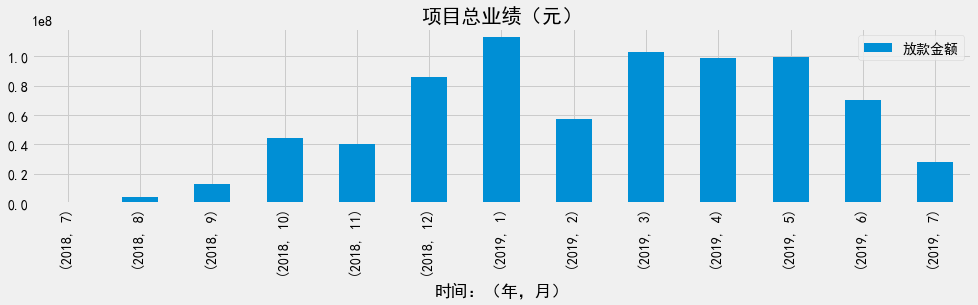

In [29]:

df[['提款成功时间','放款金额']].groupby([df['提款成功时间'].dt.year, df['提款成功时间'].dt.month]).sum()[1:].plot(kind='bar',title='项目总业绩（元）',figsize=(15,3)).set_xlabel('时间：（年，月）')
# 从版本 0.23.0 开始,由于多索引级别名称必须唯一的限制,如有报错，必须重命名级别才能使其工作

- **1、由图可知，项目经历7个月淡季和5个月旺季。**  
旺季平均每月业绩：1亿元；  
淡季平均每月业绩：3千万元；  
- **2、旺季时间节点处在春节前后，资金需求旺盛；**  
2019年2月因春节放假导致在旺季中业绩不达平均；  
- **3、年中资金需求逐步下降，进入行业淡季。**  
  
  - **建议：**进入淡季，客流量下降，**重点把握各环节转换率**，平缓过渡；

## 项目各部门业绩

In [30]:
df[['提款成功时间','放款金额','部门名称']].groupby([df['提款成功时间'].dt.year, df['提款成功时间'].dt.month,df[df['部门名称']!=0]['部门名称'] ]).sum()[5:]
#筛选分组，每月各部门业绩

放款金额
提款成功时间 提款成功时间 部门名称              
2018   9      客服      9861600.00
              贷款业务三部   267000.00
       10     客服     13810000.00
              贷款业务一部 15744900.00
              贷款业务三部 12386900.00
       11     客服     11391100.00
              贷款业务一部 15542300.00
              贷款业务三部 11602300.00
       12     客服     26987700.00
              贷款业务一部 31712800.00
              贷款业务三部 23652100.00
2019   1      客服     38419700.00
              贷款业务一部 40794800.00
              贷款业务三部 27854900.00
       2      客服     21922000.00
              贷款业务一部 20962400.00
              贷款业务三部 14395500.00
       3      客服     34798600.00
              贷款业务一部 34716900.00
              贷款业务三部 33306600.00
       4      客服     29712600.00
              贷款业务一部 34772600.00
              贷款业务三部 33960100.00
       5      客服     33045000.00
              贷款业务一部 33144500.00
              贷款业务三部 33054400.00
       6      客服     24569300.00
              贷款业务一部 21329000.00
              贷款业务三部 24335300.00
       7      客服      9582000.00
              贷款业务一部  8164000.00
              贷款业务三部 10321000.00

Text(0.5, 0, '时间：（年，月）')

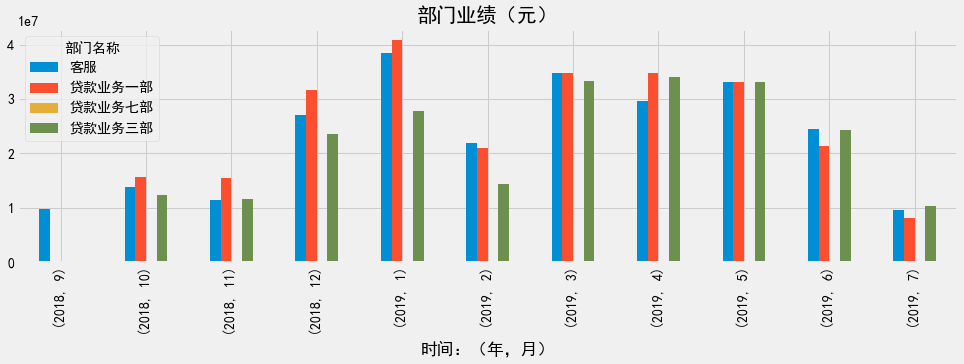

In [31]:
df.pivot_table(index=[df['提款成功时间'].dt.year,df['提款成功时间'].dt.month], values='放款金额',columns=df[(df['部门名称']!=0)&(df['部门名称']!='业务支持部')]['部门名称'],aggfunc=sum)[1:].plot(kind='bar',title='部门业绩（元）',figsize=(15,4)).set_xlabel('时间：（年，月）')
# 数据透视表形成新数据集，基于新数据集绘图

- **1、一部业绩7个月高于组平均，近两个月对比其他组有所下降；**  
组内大量实习生返校  
- **2、客服业绩前四个月低于平均，后六个月趋势好转；**  
- **3、三部业绩前五个月低于平均，后六个月趋势好转；**  
- **4、七部业绩忽略不计，项目业务人员调整；**  
  
  - **建议：**三部、客服主管**分享经验**，共同进步；同时一部补充人员；

## 客流量&转化率

In [32]:
df['放款金额'].replace(0,np.nan,inplace=True) # 将‘业绩’字段空值更正为np.nan便于统计计数
df['客流量'] = df.index # copy索引新建字段便于数据透视
df_1 = df.pivot_table(index=[df['申请时间'].dt.year,df['申请时间'].dt.month],values=['客流量','放款金额'],aggfunc='count') #df_1重构数据集

In [33]:
df_1['转换率'] = df_1['放款金额'] / df_1['客流量'] # 重构字段
df_1['转换率'] = df_1['转换率'] * 100 #转换为百分比
df_1

客流量  放款金额  转换率
申请时间 申请时间                  
2018 7       125     8 6.40
     8      1209    56 4.63
     9      5880   272 4.63
     10    10340   602 5.82
     11     7435   491 6.60
     12    24850  1405 5.65
2019 1     30064  1206 4.01
     2     22422   883 3.94
     3     25127  1313 5.23
     4     27599  1240 4.49
     5     33618  1147 3.41
     6     27531   763 2.77
     7     15073   210 1.39
     8        32     0 0.00

Text(0, 0.5, '转化率')

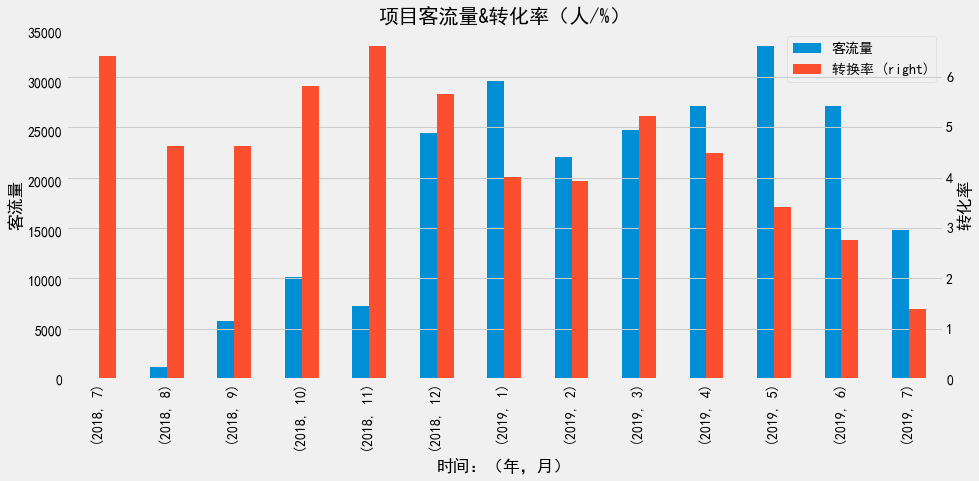

In [39]:
ax = df_1[['客流量','转换率']][:-1].plot(kind='bar',title=r'项目客流量&转化率（人/%）',figsize=(14,6),secondary_y=['转换率']) #将图形实例化赋值给变量ax
ax.set_xlabel('时间：（年，月）') #设置x轴说明
ax.set_ylabel('客流量') #设置y轴说明
ax.right_ax.set_ylabel('转化率') #设置次坐标轴说明

- **1、项目初期客流量偏少，转换率高；**  
项目初期重视程度高，客户资源优质；
- **2、项目中期客流量稳定在一定水平，201902月客流量下降，转换率下降；**  
临近春节影响客户成交意向以及业务团队工作积极性；
- **3、项目后期客流量下降严重，转换率下降严重；**  
项目后期客户资源质量逐步下降，影响转化率；


注：涉及转换率、客户资源数量和质量等将在《渠道客户资源数量分析》、《渠道客户资源质量分析》展开；

## 三、渠道客户资源数量分析（客流量）

In [38]:
df

,所在省,所在市,所在地区,省,市,姓名,借款人uid,初始额度,申请时间,分配时间,坐席名字,坐席uid,小组名称,部门名称,门店退回时间,门店提交初审时间,终审额度,提款成功时间,放款金额,数据累计通次,数据累计接通通次,数据累计有效通次,数据累计通时,客流量
流水号,,,,,,,,,,,,,,,,,,,,,,,,
201907150705437515A,江苏,无锡,新吴,江苏省,无锡市,杨新亚,15923026,49000.00,2019-08-01 23:46:49,2019-07-29 09:47:26,虞林红,26003596,一组,贷款业务一部,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,30.00,22.00,19.00,1671.00,201907150705437515A
201907100718234537A,0,0,0,广东省,江门市,冯嘉星,21576720,70000.00,2019-08-01 23:11:33,2019-05-13 10:12:10,孙雨婷,26006646,五组,贷款业务三部,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,20.00,1.00,1.00,50.00,201907100718234537A
201907090716106935A,上海市,上海市,静安区,辽宁省,沈阳市,赵玉明,15995784,300000.00,2019-08-01 21:40:48,2018-11-01 00:00:00,朱容辉,13480573,五组,贷款业务三部,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,8.00,6.00,6.00,1066.00,201907090716106935A
201907080712939428A,重庆市,重庆市,巴南区,重庆市,重庆市,陈利,22033027,54000.00,2019-08-01 21:39:05,2019-06-05 10:02:19,欧炳,14776121,一组,贷款业务一部,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,5.00,4.00,4.00,587.00,201907080712939428A
201907090716027426A,福建省,宁德市,福鼎市,福建省,宁德市,吴乃山,23119001,60000.00,2019-08-01 21:09:10,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,0.00,0.00,0.00,0.00,201907090716027426A
201907090704963753A,广东省,湛江市,徐闻县,广东省,湛江市,陆升翔,22611128,53000.00,2019-08-01 20:55:26,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,2.00,1.00,1.00,95.00,201907090704963753A
201907030694330981A,上海市,上海市,青浦区,安徽省,阜阳市,常伟,23118488,167000.00,2019-08-01 19:56:23,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,1.00,1.00,1.00,29.00,201907030694330981A
201907040705736476A,广东省,广州市,番禺区,广东省,广州市,李缘,23118344,102000.00,2019-08-01 19:30:39,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,0.00,0.00,0.00,0.00,201907040705736476A
201907080701634515A,甘肃省,武威市,凉州区,甘肃省,武威市,齐琼,23118040,170000.00,2019-08-01 18:42:31,1970-01-01 00:00:00,0,0,0,0,1970-01-01,1970-01-01 00:00:00,0.00,1970-01-01 00:00:00,nan,0.00,0.00,0.00,0.00,201907080701634515A
